In [311]:
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pathlib import Path

car_prices = Path("/Users/artemzalivchiy/Desktop/car_prices 2.csv")
prices = pd.read_csv(car_prices)
prices.head()



,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [312]:
prices[["make", "model", "body"]].head()

,make,model,body
0,Kia,Sorento,SUV
1,Kia,Sorento,SUV
2,BMW,3 Series,Sedan
3,Volvo,S60,Sedan
4,BMW,6 Series Gran Coupe,Sedan


In [313]:
popular_models = prices.loc[:, ["model"]]
popular_models

,model
0,Sorento
1,Sorento
2,3 Series
3,S60
4,6 Series Gran Coupe
...,...
558832,K900
558833,2500
558834,X5
558835,Altima


In [314]:
#Question 4
most_popular_make = []
most_popular_model = []
most_popular_make_count = []
most_popular_model_count = []

# Iterate over unique years
for year in prices['year'].unique():
    # Filter data for the current year
    year_data = prices[prices['year'] == year]
    
    # Calculate counts for each make and model for the current year
    make_counts = year_data['make'].value_counts()
    model_counts = year_data['model'].value_counts()
    
    # Get the most popular make and model for the current year
    most_popular_make.append(make_counts.idxmax() if not make_counts.empty else None)
    most_popular_model.append(model_counts.idxmax() if not model_counts.empty else None)
    
    # Get the count of the most popular make and model for the current year
    most_popular_make_count.append(make_counts.max() if not make_counts.empty else 0)
    most_popular_model_count.append(model_counts.max() if not model_counts.empty else 0)

# Create DataFrame with most popular make, model, and count for each year
most_popular = pd.DataFrame({
    'year': prices['year'].unique(), 
    'make': most_popular_make, 
    'model': most_popular_model, 
    'make count': most_popular_make_count,
    'model count': most_popular_model_count
})

# Sort the DataFrame by the 'year' column in ascending order
most_popular.sort_values(by='year', inplace=True)

print(most_popular)

    year       make     model  make count  model count
32  1982       None      None           0            0
33  1983       None      None           0            0
31  1984  chevrolet  corvette           1            1
29  1985  chevrolet  corvette           2            2
28  1986   mercedes    420sel           1            1
21  1987   mercedes      300e           1            1
30  1988       None      None           0            0
25  1989     toyota      300e           2            2
27  1990      Honda    Accord          10           10
26  1991     Toyota     Camry          15           10
24  1992     Toyota    Accord          31           22
23  1993     Toyota     Camry          48           30
22  1994      Honda    Accord          68           59
18  1995     Toyota     Camry         117           51
19  1996     Toyota    Accord         133           56
20  1997       Ford    Accord         223           92
17  1998      Honda    Accord         283          172
16  1999  

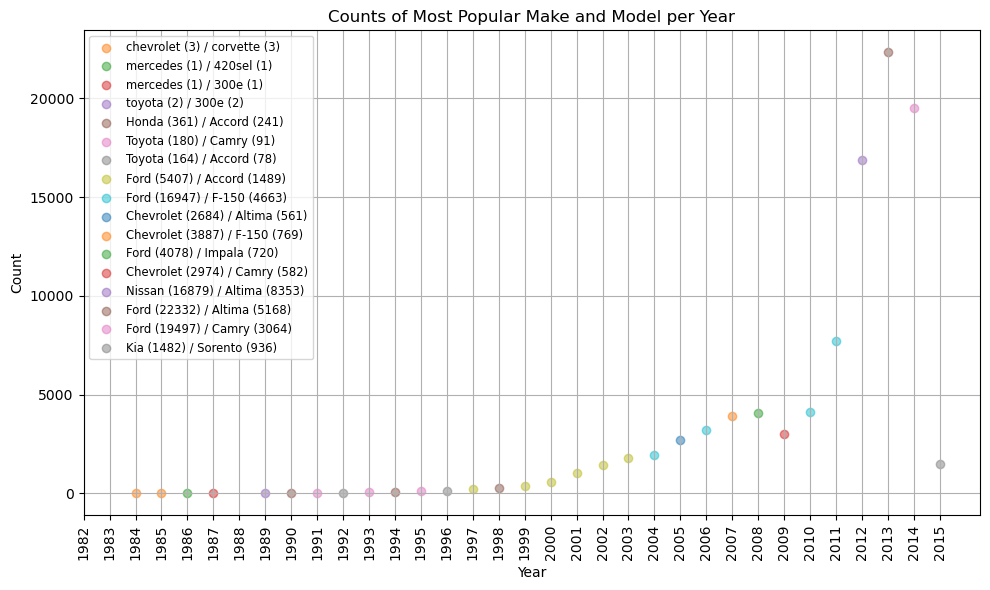

In [315]:
#Question 4 graph 
plt.figure(figsize=(10, 6))

# Get unique combinations of make and model
unique_combinations = most_popular[['make', 'model']].drop_duplicates().reset_index(drop=True)

# Assign a unique color for each combination
colors = plt.cm.tab10.colors[:len(unique_combinations)]

# Create scatter plot with different colors for each combination
for index, row in unique_combinations.iterrows():
    combination_data = most_popular[(most_popular['make'] == row['make']) & (most_popular['model'] == row['model'])]
    if not combination_data.empty:
        plt.scatter(combination_data['year'], combination_data['make count'], color=colors[index % len(colors)], alpha=0.5,
                    label=f"{row['make']} ({combination_data['make count'].sum()}) / {row['model']} ({combination_data['model count'].sum()})")

# Set ticks for every year on the x-axis and rotate them by 90 degrees
plt.xticks(most_popular['year'], rotation=90)

# Add legend to the top left corner
plt.legend(loc='upper left', fontsize='small')

plt.title('Counts of Most Popular Make and Model per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [316]:
transmission_counts= prices['transmission'].value_counts()
print(transmission_counts)

transmission
automatic    475915
manual        17544
sedan            15
Sedan            11
Name: count, dtype: int64


In [317]:
transmission = prices.loc[:, ['transmission']]
transmission.head(10)

,transmission
0,automatic
1,automatic
2,automatic
3,automatic
4,automatic
5,automatic
6,automatic
7,automatic
8,automatic
9,automatic


In [318]:
prices.count()

year            558837
make            548536
model           548438
trim            548186
body            545642
transmission    493485
vin             558833
state           558837
condition       547017
odometer        558743
color           558088
interior        558088
seller          558837
mmr             558799
sellingprice    558825
saledate        558825
dtype: int64

In [319]:
color_distribution_no = prices.dropna(how='any')
color_distribution_no

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [320]:
#Question 5 
color_distribution = prices['color'].value_counts()
color_distribution

color
black        110970
white        106673
silver        83389
gray          82857
blue          51139
red           43569
—             24685
green         11382
gold          11342
beige          9222
burgundy       8972
brown          6717
orange         2078
purple         1561
off-white      1449
yellow         1285
charcoal        479
turquoise       236
pink             42
lime             15
9562              1
2846              1
18561             1
18384             1
5705              1
2817              1
6158              1
721               1
20627             1
20379             1
9837              1
9887              1
2172              1
339               1
6864              1
2711              1
11034             1
16633             1
6388              1
15719             1
12655             1
14872             1
1167              1
9410              1
4802              1
5001              1
Name: count, dtype: int64

In [321]:
#Question 5 exterior 
valid_colors = prices['color'].apply(lambda x: isinstance(x, str) and x.strip() != '' and not any(c.isdigit() for c in x) and not any(c == '—' for c in x))

# Get value counts of valid colors
color_distribution = prices[valid_colors]['color'].value_counts()

# Display the result
print(color_distribution)

color
black        110970
white        106673
silver        83389
gray          82857
blue          51139
red           43569
green         11382
gold          11342
beige          9222
burgundy       8972
brown          6717
orange         2078
purple         1561
off-white      1449
yellow         1285
charcoal        479
turquoise       236
pink             42
lime             15
Name: count, dtype: int64


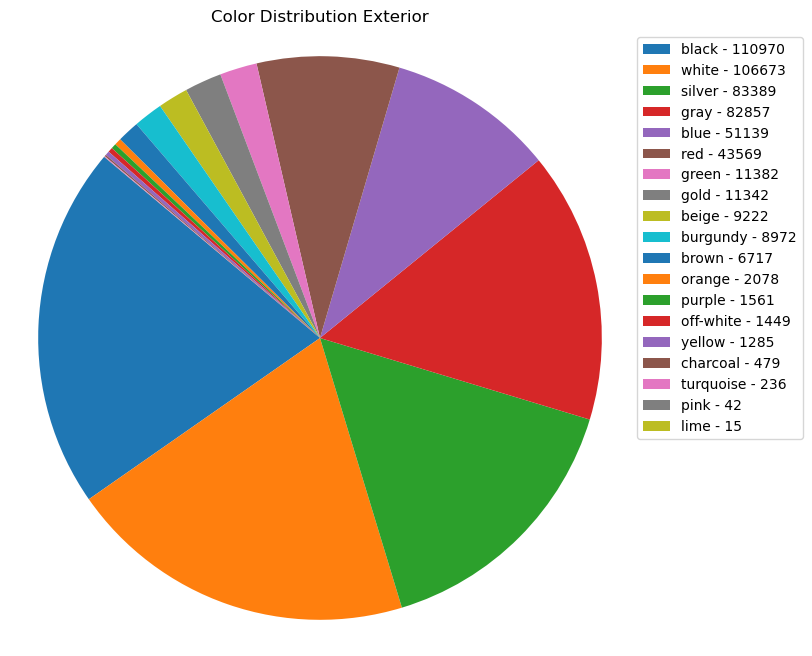

In [322]:
#Question 5 exterior graph 
valid_colors = color_distribution[~color_distribution.index.str.contains("—")]

# Create a pie chart
plt.figure(figsize=(8, 8))
patches, _ = plt.pie(valid_colors, startangle=140)
plt.title('Color Distribution Exterior')

# Create legend with color counts
labels = ['{} - {}'.format(label, count) for label, count in zip(valid_colors.index, valid_colors.values)]
plt.legend(patches, labels, loc="best", bbox_to_anchor=(1, 1))

plt.axis('equal')  
plt.show()

In [323]:
#Question 5 but for interior 
color_distribution = prices['interior'].value_counts()
color_distribution

interior
black        244329
gray         178581
beige         59758
tan           44093
—             17077
brown          8640
red            1363
blue           1143
silver         1104
off-white       480
purple          339
gold            324
white           256
green           245
burgundy        191
orange          145
yellow           20
Name: count, dtype: int64

In [324]:
valid_interior = prices['interior'].apply(lambda x: isinstance(x, str) and x.strip() != '' and not any(c == '—' for c in x))

# Get value counts of valid interior colors
interior_distribution = prices[valid_interior]['interior'].value_counts()

# Display the result
print(interior_distribution)

interior
black        244329
gray         178581
beige         59758
tan           44093
brown          8640
red            1363
blue           1143
silver         1104
off-white       480
purple          339
gold            324
white           256
green           245
burgundy        191
orange          145
yellow           20
Name: count, dtype: int64


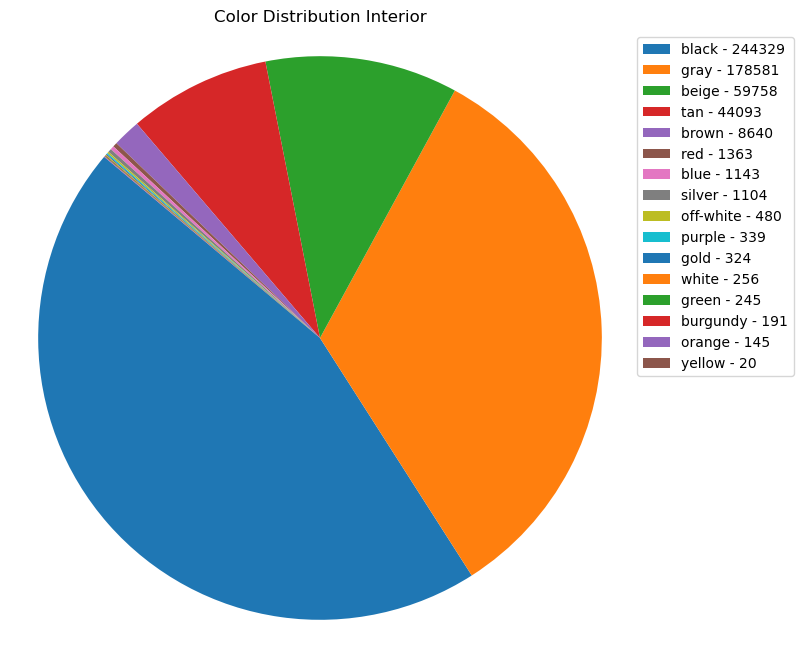

In [325]:
#Question 5 interior graph 
# Filter out valid interior colors
valid_interior = prices['interior'].apply(lambda x: isinstance(x, str) and x.strip() != '' and not any(c == '—' for c in x))
interior_distribution = prices[valid_interior]['interior'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
patches, _ = plt.pie(interior_distribution, startangle=140)
plt.title('Color Distribution Interior')

# Create legend with color counts
labels = ['{} - {}'.format(label, count) for label, count in zip(interior_distribution.index, interior_distribution.values)]
plt.legend(patches, labels, loc="best", bbox_to_anchor=(1, 1))

plt.axis('equal')  
plt.show()

In [328]:
#Question 11
# Filter out rows with state codes of length 2
prices_filtered = prices[prices['state'].str.len() == 2]

# Group by 'state' to get the count of dealerships per state
dealership_count_per_state = prices_filtered.groupby('state').size().reset_index(name='total_dealerships')

# Drop specified columns from the DataFrame
columns_to_drop = ['year', 'model', 'make', 'trim', 'body', 'transmission', 'vin', 'condition', 'odometer', 'color', 'interior', 'mmr', 'sellingprice', 'saledate', 'Profit']
prices = prices.drop(
    labels=columns_to_drop,
    axis=1,
    inplace=False
)

# Display the count of dealerships per state and the modified DataFrame
display(dealership_count_per_state)

,state,total_dealerships
0,ab,928
1,al,26
2,az,8741
3,ca,73148
4,co,7775
5,fl,82945
6,ga,34750
7,hi,1237
8,il,23486
9,in,4325


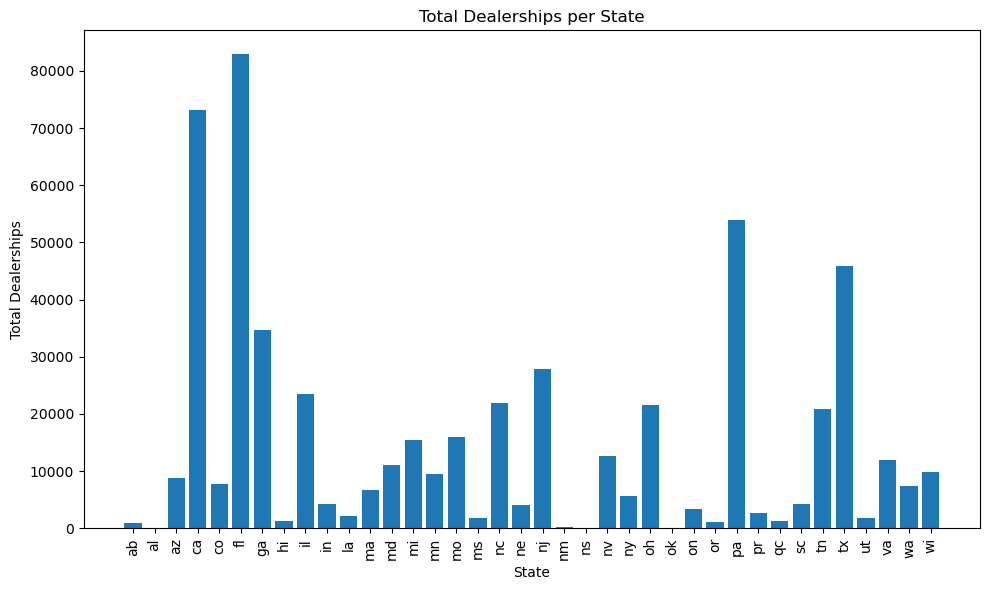

In [329]:
#Question 11
prices_filtered = prices[prices['state'].str.len() == 2]

# Group by 'state' to get the count of dealerships per state
dealership_count_per_state = prices_filtered.groupby('state').size().reset_index(name='total_dealerships')

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(dealership_count_per_state['state'], dealership_count_per_state['total_dealerships'])
plt.xlabel('State')
plt.ylabel('Total Dealerships')
plt.title('Total Dealerships per State')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()